<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Чтение данных

In [43]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
hh_df = hh_data.copy()

2. Последние 5 сток. Данные не повреждены.

In [44]:
hh_df.tail(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Основная информация о числе непустых значений в столбцах и их типах в таблице.

In [45]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратим внимание на информацию о числе непустых значений.

In [46]:
print(hh_df['Опыт работы'].count())
print(hh_df['Последнее/нынешнее место работы'].count())
print(hh_df['Последняя/нынешняя должность'].count())

44576
44743
44742


5. Основная статистической информации о столбцах.


In [47]:
#Сколько уникальных значений содержится в столбце «Опыт работы»?
print(hh_df['Опыт работы'].nunique())

#Какая из искомых должностей самая распространённая?
print(hh_df['Ищет работу на должность:'].value_counts())

44413
Системный администратор                                                  3099
Инженер                                                                   966
Аналитик                                                                  809
Менеджер проектов                                                         745
Руководитель проекта                                                      718
                                                                         ... 
Системный администратор Linux, DevOps, Разработчик Golang                   1
Инженер КИПиА,инженер АСУТП ,видеоинженер                                   1
SEO-специалист | Специалист по интернет-рекламе | Интернет-маркетолог       1
Специалист технических систем безопастности                                 1
Аналитик данных, Математик                                                  1
Name: Ищет работу на должность:, Length: 14929, dtype: int64


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создадим с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполним преобразование, а затем удалим признак "Образование и ВУЗ".

Обратим внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы.

*Проверим полученные категории с помощью метода unique()*


In [48]:
def get_education_level(example):
    splited_example = example.split()
    if splited_example[0] == 'Высшее':
        return 'высшее'
    elif splited_example[0] == 'Неоконченное':
        return 'неоконченное высшее'
    elif splited_example[0] == 'Среднее' and splited_example[1] == 'специальное':
        return 'среднее специальное'
    elif splited_example[0] == 'Среднее':
        return 'среднее'
    else:
        return example


hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education_level)
hh_df['Образование'] = hh_df['Образование'].astype('category') # Изменение типа на категориальный

hh_df = hh_df.drop(['Образование и ВУЗ'], axis=1)

hh_df['Образование'].value_counts() # Проверка результата

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Нам необходимо выделить каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполним преобразование, а затем удалим признак **"Пол, возраст"** из таблицы.

*Обратитм внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице.*


In [49]:
def get_gender(gender):
    if gender[0] == 'М':
        return 'М'
    elif gender[0] == 'Ж':
        return 'Ж'
    else:
        return 0


hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)
hh_df['Пол'] = hh_df['Пол'].astype('category')

hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda age: age.split()[2])
hh_df['Возраст'] = hh_df['Возраст'].astype('int16')

hh_df = hh_df.drop(['Пол, возраст'], axis=1)

display(hh_df['Пол'].value_counts()) # Проверка результатов
display(hh_df['Возраст'].value_counts())

М    36211
Ж     8533
Name: Пол, dtype: int64

30     2834
29     2765
28     2748
31     2675
27     2583
       ... 
15        2
77        1
76        1
14        1
100       1
Name: Возраст, Length: 63, dtype: int64

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

В результате преобразования должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполним преобразование, а затем удалим столбец **"Опыт работы"** из таблицы.


In [50]:
def get_work_experience(job):
    if job == np.nan or job == 'Не указано' or job == 'nan':
        return np.nan
    
    if type(job) is not float:
        splited_job = job.split()
        fourth_word = splited_job[3]
        sixth_word = splited_job[5]
        
        if fourth_word == 'месяца' or fourth_word == 'месяц' or fourth_word == 'месяцев':
            return int(splited_job[2])
        
        elif fourth_word == 'год' or fourth_word == 'лет' or fourth_word == 'года':
            if sixth_word == 'месяца' or sixth_word == 'месяц' or sixth_word == 'месяцев':
                years, months = int(splited_job[2]), int(splited_job[4])
                return years*12 + months
            
            else: return int(splited_job[2]) * 12
            
        else: return job
        
    else: return job


hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_work_experience)

hh_df = hh_df.drop(['Опыт работы'], axis=1)

4. Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполним преобразования и удалим столбец **"Город, переезд, командировки"** из таблицы.

*Структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [51]:
def get_city(info):
    city = info.split()[0]
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    if city in million_cities:
        return 'город-миллионник'
    elif city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'другие'
    
    
def movement_preparedness(info):
    if 'не готов к переезду' in info or 'не готова к переезду' in info:
        return False
    elif 'хочу' in info:
        return True
    else:
        return True
    
def trip_preparedness(info):
    if 'командировка' in info:
        if ('не готов к командировкам' in info) or('не готова к командировкам' in info):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(movement_preparedness)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(trip_preparedness)

hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

# Сколько процентов соискателей живут в Санкт-Петербурге?
print(hh_df['Город'].value_counts(normalize=True)['Санкт-Петербург'])

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?
print(hh_df[hh_df['Готовность к переезду'] & hh_df['Готовность к командировкам']]['Город'].count()/44744)

0.11033881637761488
0.3186572501340962


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполним данное преобразование для признаков "Занятость" и "График", а затем удалим их из таблицы.

In [52]:
employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']
schedules = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for busy, schedule in zip(employment, schedules):
    hh_df[busy] = hh_df['Занятость'].apply(lambda x: busy in x)
    hh_df[schedule] = hh_df['График'].apply(lambda x: schedule in x)
    
hh_df = hh_df.drop('Занятость', axis=1)
hh_df = hh_df.drop('График', axis=1)

# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
print(hh_df[hh_df['проектная работа'] & hh_df['волонтерство']].shape[0])

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(hh_df[hh_df['вахтовый метод'] & hh_df['гибкий график']].shape[0])

436
2311


6. Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019.

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс. А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалитм исходный столбец заработной платы "ЗП" и все промежуточные столбцы.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [53]:
# Подготовка таблицы с курсом валют
Exchange_data = pd.read_csv('data/ExchangeRates.csv', sep=',')
Exchange_df = Exchange_data.copy()
Exchange_df = Exchange_df.drop(['per', 'vol', 'time'], axis=1)
Exchange_df['date'] = pd.to_datetime(Exchange_df['date'], dayfirst=True).dt.date
# Получение 2-х признаков: Размера и Валюты заработной платы
iso_curr = {'руб.' : 'RUB', 
            'грн.' : 'UAH', 
            'бел.руб.' :'BYN', 
            'сум' : 'UZS'}

hh_df['Валюта ЗП'] = hh_df['ЗП'].apply(lambda x: iso_curr[x.split()[1]] if x.split()[1] in iso_curr else x.split()[1])
hh_df['Размер ЗП'] = hh_df['ЗП'].apply(lambda x: x.split()[0])
hh_df['Размер ЗП'] = hh_df['Размер ЗП'].astype('float')
# Изменение типа на datetime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date
# Слияние таблиц
hh_df = hh_df.merge(
    Exchange_df,
    how='left',
    left_on=('Обновление резюме', 'Валюта ЗП'),
    right_on=('date', 'currency')
    )
# Заполнение пропусков (валюта - рубль)
hh_df['close'] = hh_df['close'].fillna(1)
hh_df['proportion'] = hh_df['proportion'].fillna(1)
# Получение зарплаты в рублях
hh_df['ЗП (руб)'] = hh_df['Размер ЗП'] * hh_df['close'] / hh_df['proportion']
# Удаление нишних признаков
hh_df = hh_df.drop(['ЗП', 'Валюта ЗП', 'Размер ЗП', 'currency', 'date', 'close', 'proportion'], axis=1)

# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
hh_df['ЗП (руб)'].median()

59019.0

# Исследование зависимостей в данных

1. Построим распределение признака **"Возраст"**. Опишем распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения можно причислить к их числу?
*Построим гистограмму и коробчатую диаграмму рядом.*

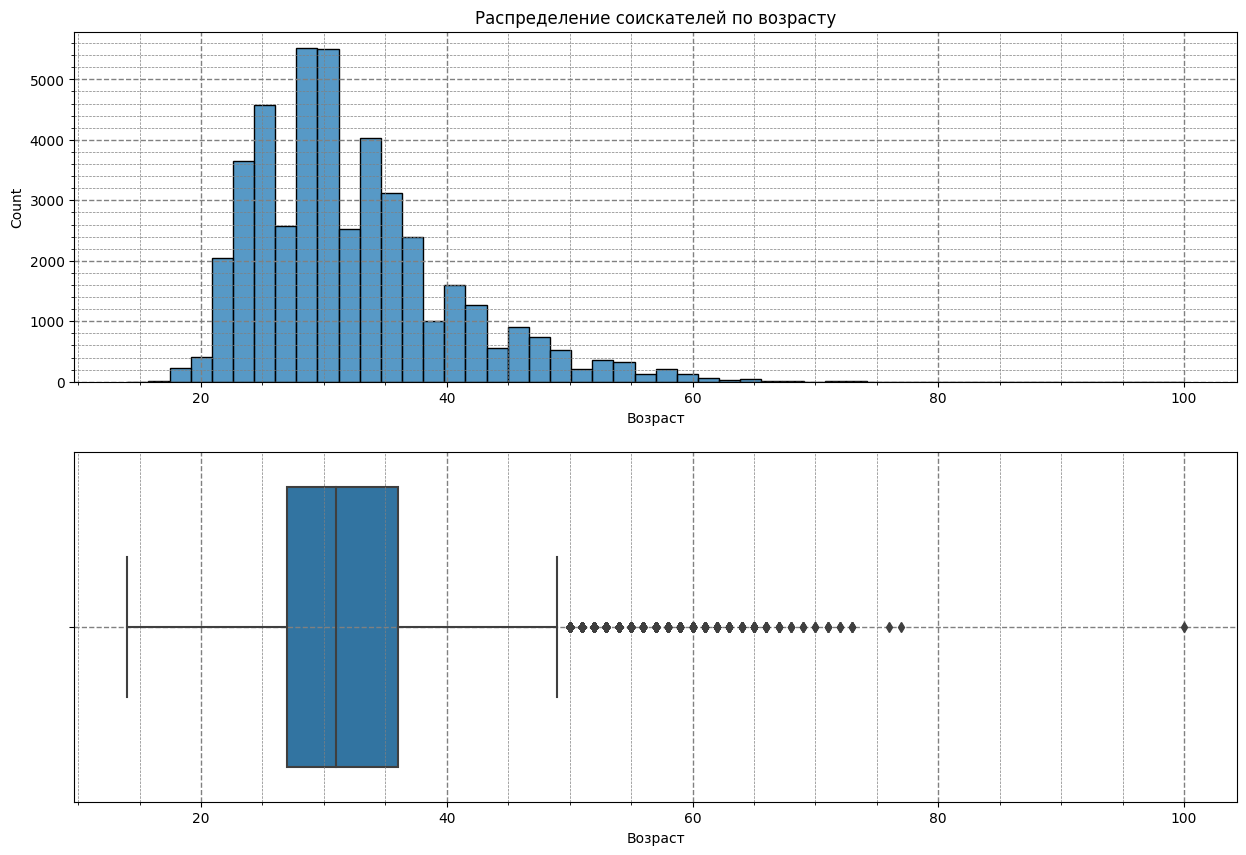

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

sns.histplot(
    data=hh_df,
    x='Возраст',
    bins=50,
    ax=axes[0]
)
axes[0].set_title('Распределение соискателей по возрасту')

axes[0].minorticks_on()
axes[0].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
axes[0].grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')

sns.boxplot(
    data=hh_df,
    x='Возраст'
)

axes[1].minorticks_on()
axes[1].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
axes[1].grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')

In [56]:
print('Модальное значение возраста соискателей:', hh_df['Возраст'].mode())

Модальное значение возраста соискателей: 0    30
Name: Возраст, dtype: int16


**Вывод**: Люди начитают работать в 16-18 лет, а пик количества соискателей приходится на 30 лет. Есть аномалии, но в целом нормальное распределение.

2. Построим распределение признака **"Опыт работы (месяц)"**. Опишем данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения можно причислить к их числу?
*Построим гистограмму и коробчатую диаграмму рядом.*

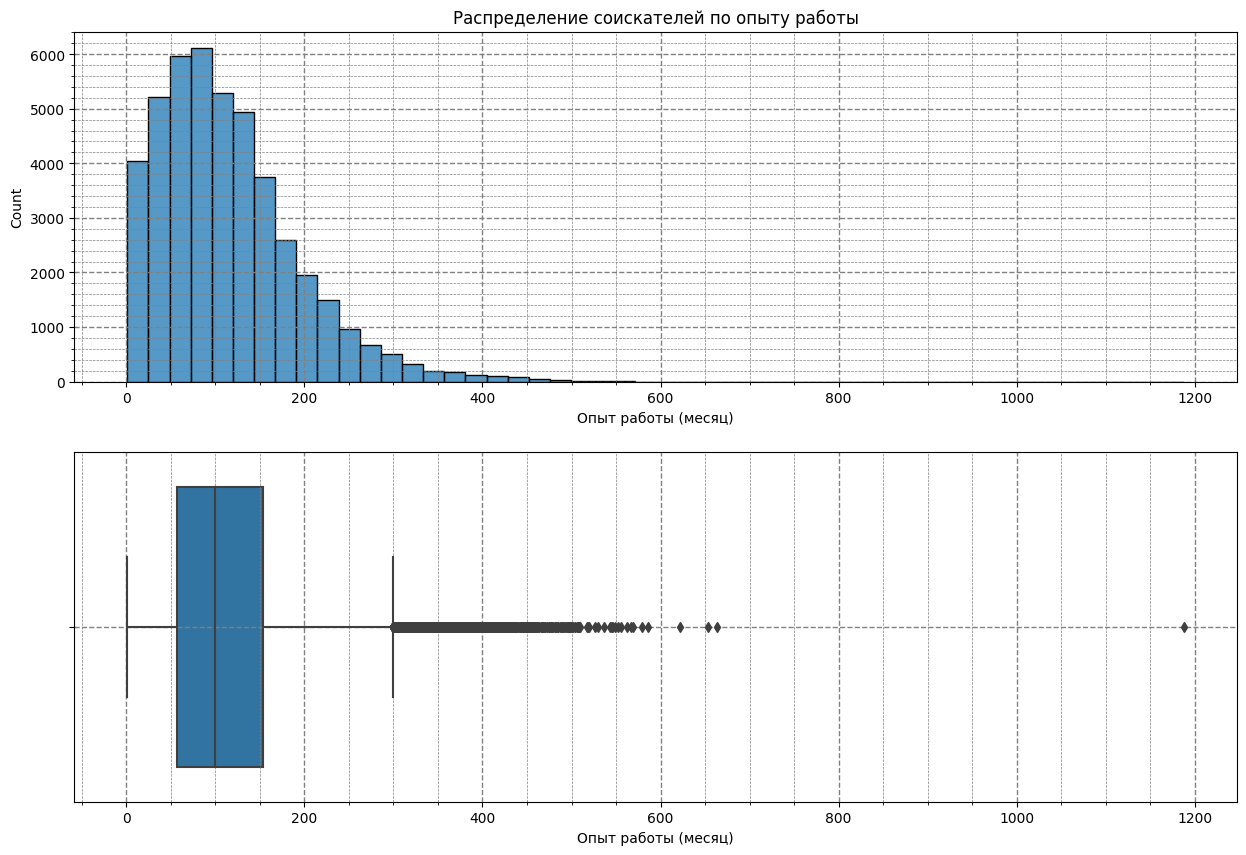

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
# постоение гистограммы
sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    bins=50,
    ax=axes[0]
)
axes[0].set_title('Распределение соискателей по опыту работы')

axes[0].minorticks_on()
axes[0].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
axes[0].grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')


# постоение коробчатой диаграммы
sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)'
)

axes[1].minorticks_on()
axes[1].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
axes[1].grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')

In [58]:
print('Максимальны опыт работы:', hh_df['Опыт работы (месяц)'].max())

Максимальны опыт работы: 1188.0


ваши выводы здесь

3. Построим распределение признака **"ЗП (руб)"**. Опишем данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака? Обратим внимание на гигантские размеры желаемой заработной платы.
*Построим гистограмму и коробчатую диаграмму рядом.*


Максимальное значение признака ЗП (руб): 24304876.0
Медианное значение признака ЗП (руб): 59019.0


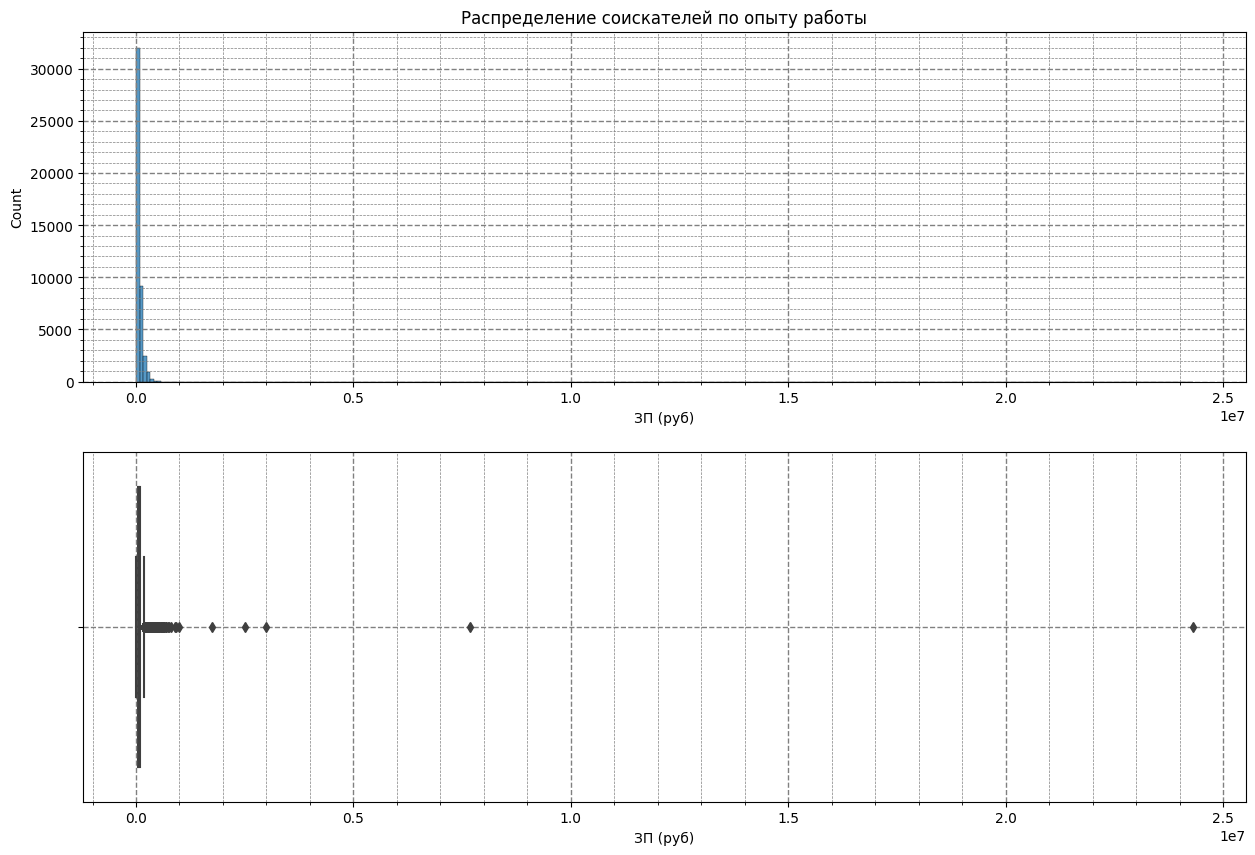

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
# постоение гистограммы
sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    bins=300,
    ax=axes[0]
)
axes[0].set_title('Распределение соискателей по опыту работы')

axes[0].minorticks_on()
axes[0].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
axes[0].grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')


# постоение коробчатой диаграммы
sns.boxplot(
    data=hh_df,
    x='ЗП (руб)'
)

axes[1].minorticks_on()
axes[1].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
axes[1].grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')

print('Максимальное значение признака ЗП (руб):', hh_df['ЗП (руб)'].max())
print('Медианное значение признака ЗП (руб):', hh_df['ЗП (руб)'].median())

**Вывод**: 5 соискателей требуют зарплату более миллиона.

4. Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Выводы по представленной диаграмме будут следующие: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [61]:
hh_df[hh_df['Образование'] == 'высшее']['ЗП (руб)'].mean()

84081.43223066896

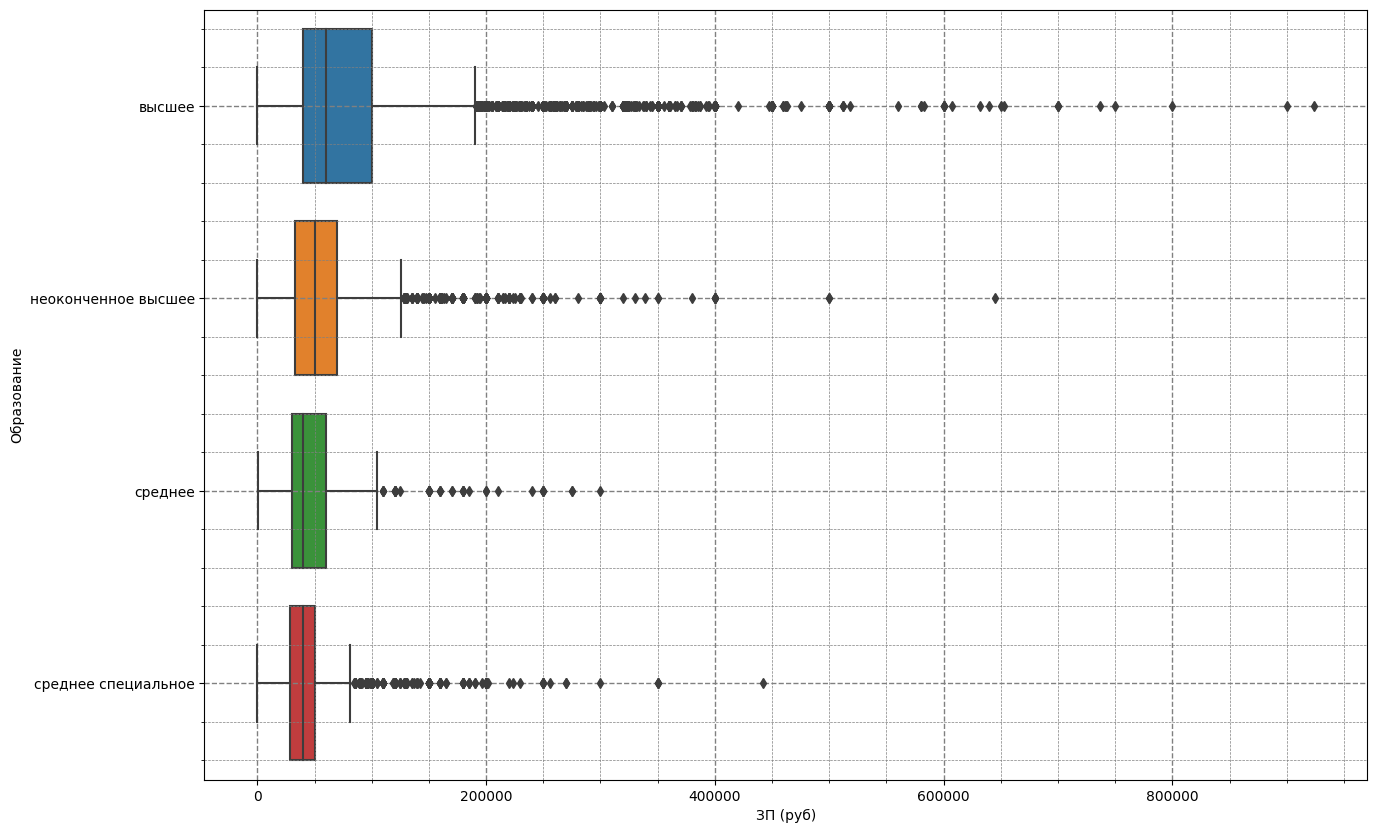

In [62]:
fig = plt.subplots(figsize=(15,10))
# постоение гистограммы
boxplt = sns.boxplot(
    data=hh_df[hh_df['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    y='Образование',
    orient = 'h'
)


boxplt.minorticks_on()
boxplt.grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
boxplt.grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')

**Вывод**: Медианная зарплата, и разброс запрлаты выше у людей с высшим образование, при этом и выборка там больше.

5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используем для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Выводы по полученной диаграмме будут следующие: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

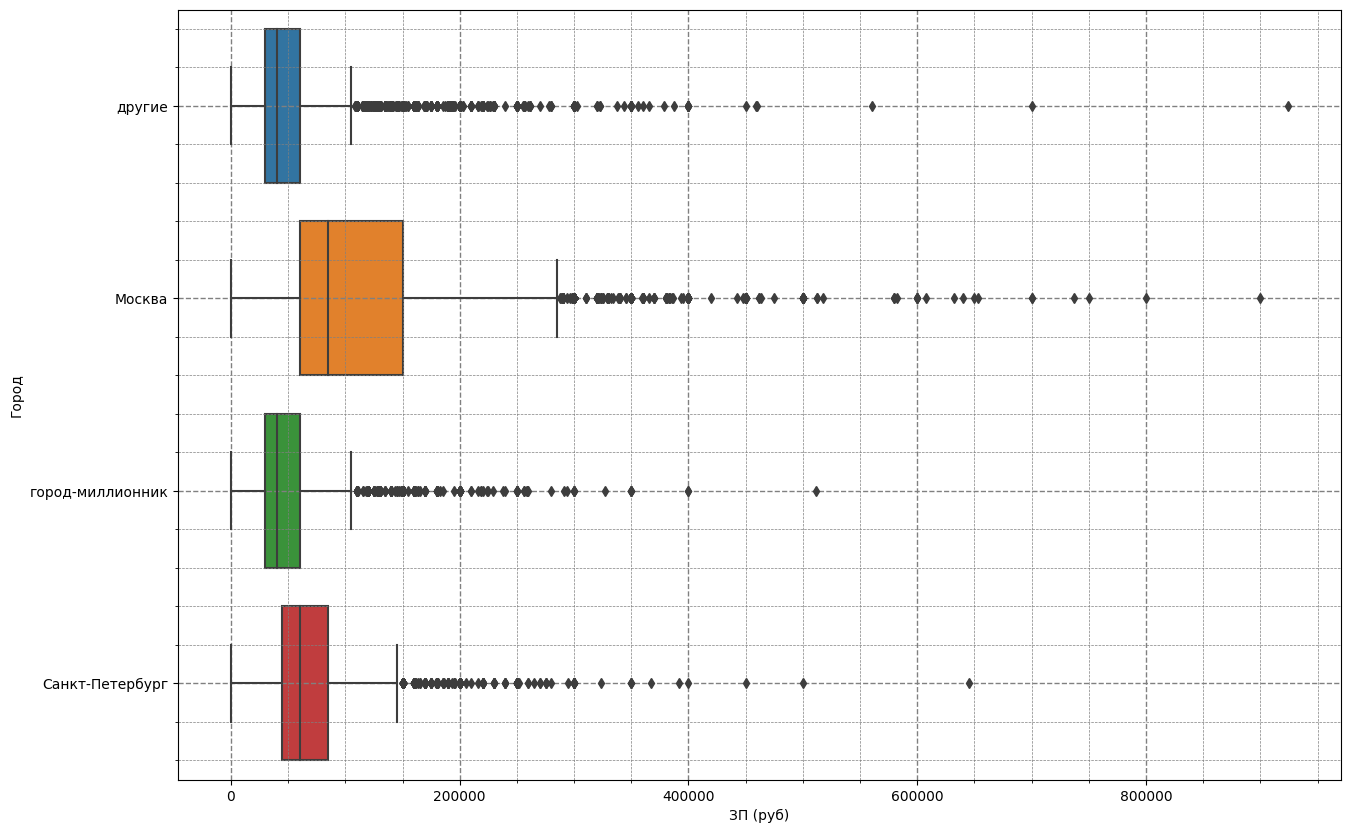

In [63]:
fig = plt.subplots(figsize=(15,10))
# постоение гистограммы
boxplt = sns.boxplot(
    data=hh_df[hh_df['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    y='Город',
    orient = 'h'
)

boxplt.minorticks_on()
boxplt.grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')
boxplt.grid(which='minor',
        color = 'grey',
        linewidth = 0.5,
        linestyle = '--')

**Вывод**: Зарплаты выше в Москве и Санкт-Петербурге, а другие города не отличаются от городов-миллионников. При поиске соискателей в столице, стоит дополнительно обратить внимание на готовность человека к переезду.

6. Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируем график, сравнив уровень заработной платы в категориях.

Text(0.5, 1.0, 'Медианная ЗП')

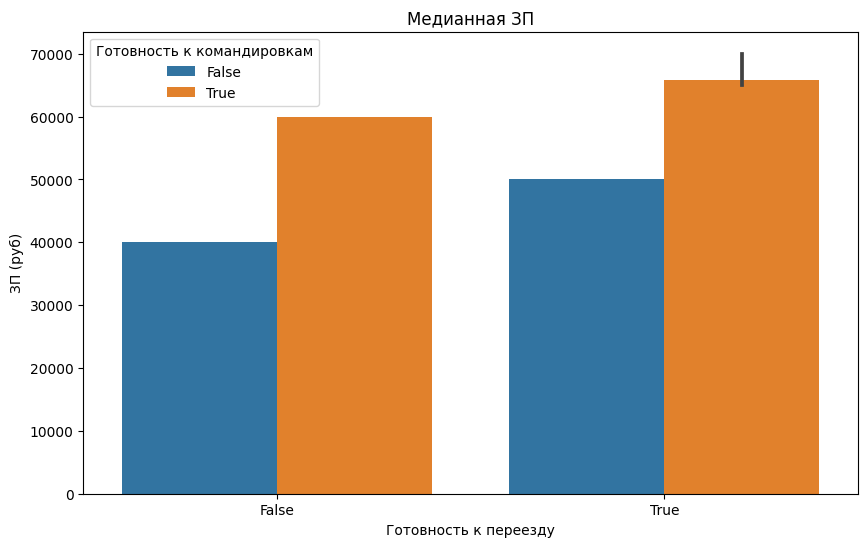

In [64]:
fig = plt.subplots(figsize=(10,6))

median_salary_bar = sns.barplot(
    data=hh_df,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator = 'median'
)

median_salary_bar.set_title('Медианная ЗП')

**Вывод**: Чем более универсальный человек, тем выше у него зарплата.

7. Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**. Проанализируем тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Медианная зарплата')

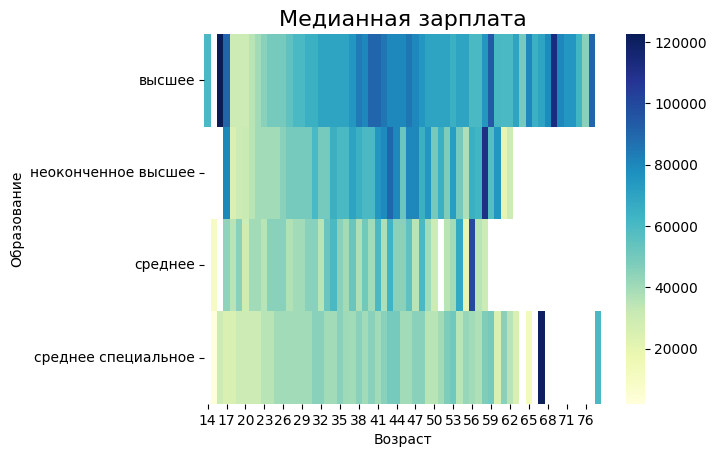

In [65]:
median_pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
)
median_pivot.columns = median_pivot.columns.astype('string')

median_salary_heatmap = sns.heatmap(data=median_pivot, cmap='YlGnBu')
median_salary_heatmap.set_title('Медианная зарплата', fontsize=16)

**Вывод**: Выводов по медианная зарплате у людей с среднем обрпзованием сделать нельзя в связи с маленькой выборкой. У остальных же наблюдается максимум к 40 годам, и дальнейший спад. Дедианная зарплата людей с высшем образованием выше остальных.

8. Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

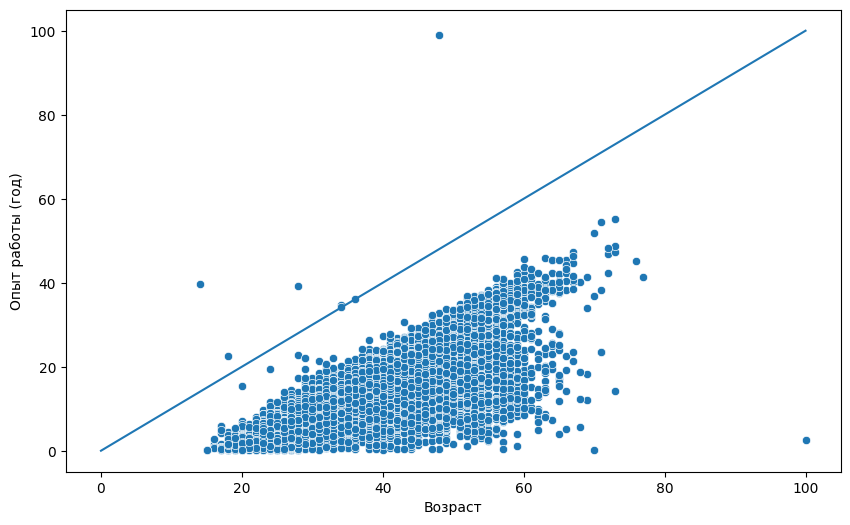

In [66]:
fig = plt.subplots(figsize=(10,6))

line_df = pd.DataFrame({
    'Возраст': [0, 100],
    'Опыт работы (год)': [0, 100]
    })

hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'] / 12

exp_age_scatter = sns.scatterplot(
    data=hh_df,
    x='Возраст',
    y='Опыт работы (год)'
)

line = sns.lineplot(
    data = line_df,
    x='Возраст',
    y='Опыт работы (год)'
)

hh_df = hh_df.drop('Опыт работы (год)', axis=1)

**Вывод**: Люди начинаю работать в период с 16 до 44 лет. При этом, если обратить внимание на график, образованный людьми, начавшими работать с 16-18 лет, видно, что он имеет логарифмическую зависимость. Это связано со смертностью.

Дополнительные графики по разведывательному анализу. Постройтим еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведем выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


79

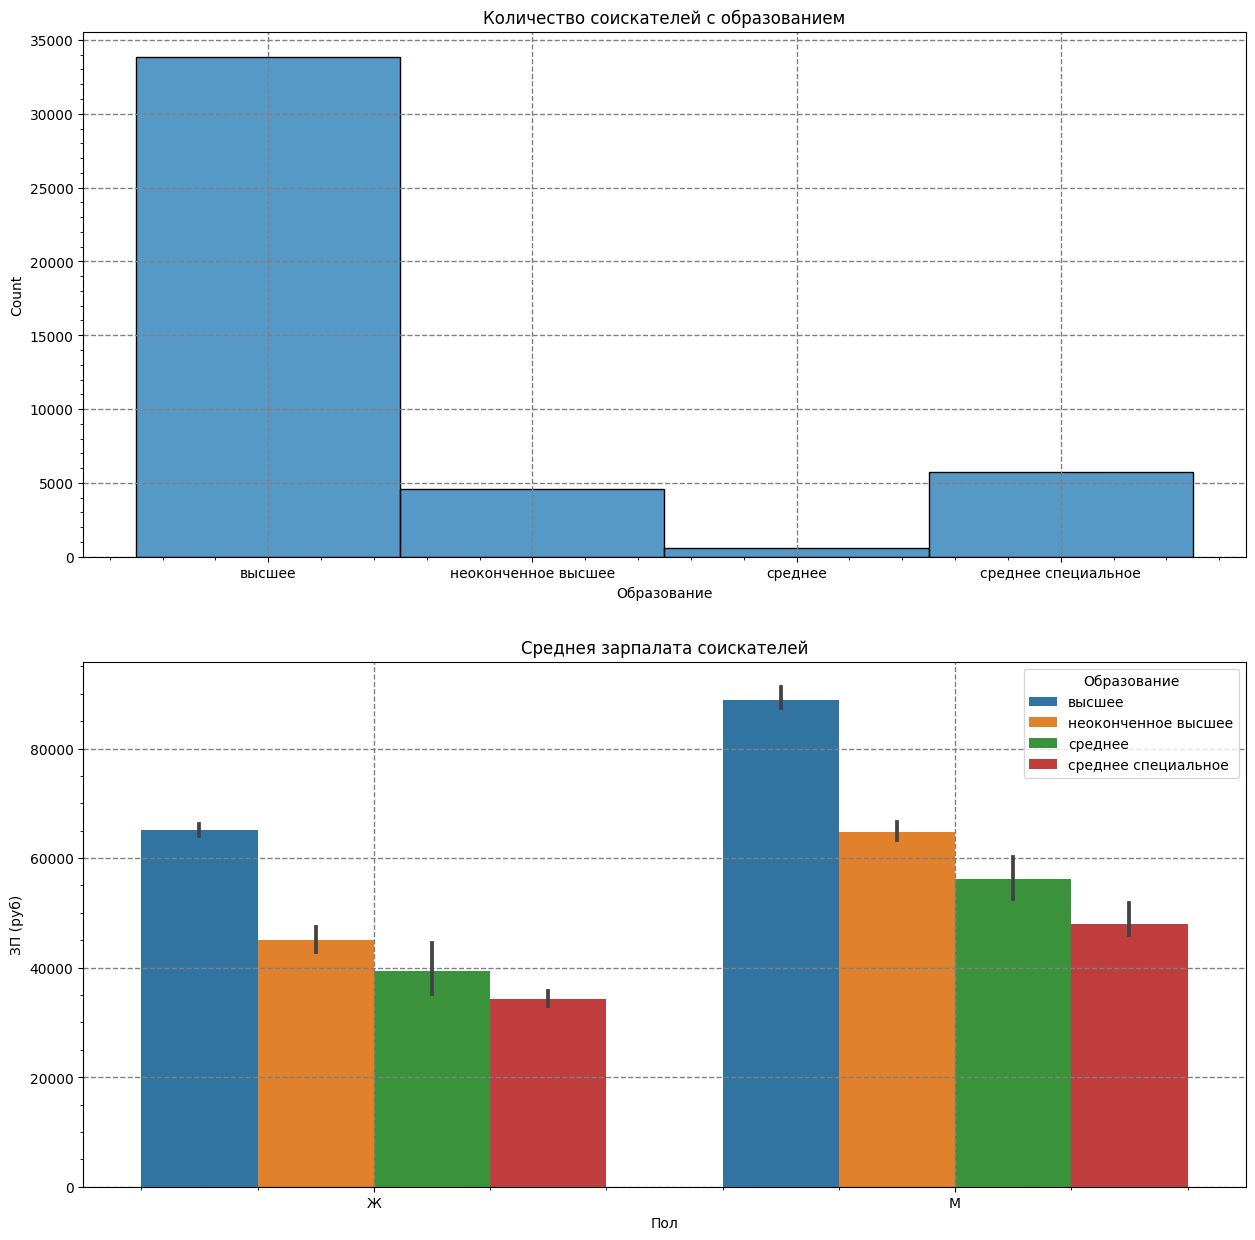

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
# постоение гистограммы
sns.histplot(
    data=hh_df,
    x='Образование',
    ax=axes[0]
)
axes[0].set_title('Количество соискателей с образованием')
axes[0].minorticks_on()
axes[0].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')

sns.barplot(
    data=hh_df,
    x='Пол',
    y='ЗП (руб)',
    hue='Образование',
    estimator = 'mean'
)
axes[1].set_title('Среднея зарпалата соискателей')
axes[1].minorticks_on()
axes[1].grid(which='major',
        color = 'grey',
        linewidth = 1,
        linestyle = '--')

hh_df[(hh_df['Образование'] == 'среднее') & (hh_df['Пол'] == 'Ж')].shape[0]

In [96]:
man =hh_df[(hh_df['Образование'] == 'высшее') & (hh_df['Пол'] == 'М')]['ЗП (руб)'].mean()
woman = hh_df[(hh_df['Образование'] == 'высшее') & (hh_df['Пол'] == 'Ж')]['ЗП (руб)'].mean()
print(man, '\n', woman, '\n', woman/man)

88942.26276043996 
 65083.3985439397 
 0.7317488505912817


Вывод: Как видно из графиков, больше всего соискателей с высшим образованием, при этом количество человек с высшем обазованием преобладает. Количество соискателей со среднем образованием мало, а женщин особо мало(79). При этом зарплата у женщин как правило на  20-30% меньше.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдем **полные дубликаты** в таблице с резюме и удалим их. 

In [28]:
print(f'До очистки дубликаров: {hh_df.shape[0]}')
hh_df = hh_df.drop_duplicates() 
print(f'После очистки дубликотов: {hh_df.shape[0]}')

До очистки дубликаров: 44744
После очистки дубликотов: 44583


2. Займемся пропусками. Выведем информацию **о числе пропусков** в столбцах. 
Сколько пропусков в столбце «Опыт работы (месяц)»?

In [29]:
hh_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
полный день                          0
частичная занятость                  0
сменный график                       0
проектная работа                     0
гибкий график                        0
стажировка                           0
удаленная работа                     0
волонтерство                         0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [30]:
hh_df = hh_df.dropna(subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'])
hh_df = hh_df.fillna(hh_df['Опыт работы (месяц)'].median())

hh_df['Опыт работы (месяц)'].mean()

114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [31]:
dropper = hh_df[(hh_df['ЗП (руб)'] > 1000000) | (hh_df['ЗП (руб)'] < 1000)]

hh_df = hh_df.drop(dropper.index, axis=0)

dropper.shape[0]

89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдем такие резюме и удалим их из данных


In [32]:
dropper = hh_df[hh_df['Опыт работы (месяц)'] / 12 >= hh_df['Возраст']]

hh_df = hh_df.drop(dropper.index, axis=0)

dropper.shape[0]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуем построить распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**. 

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведем таблицу с полученными выбросами и оценим, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


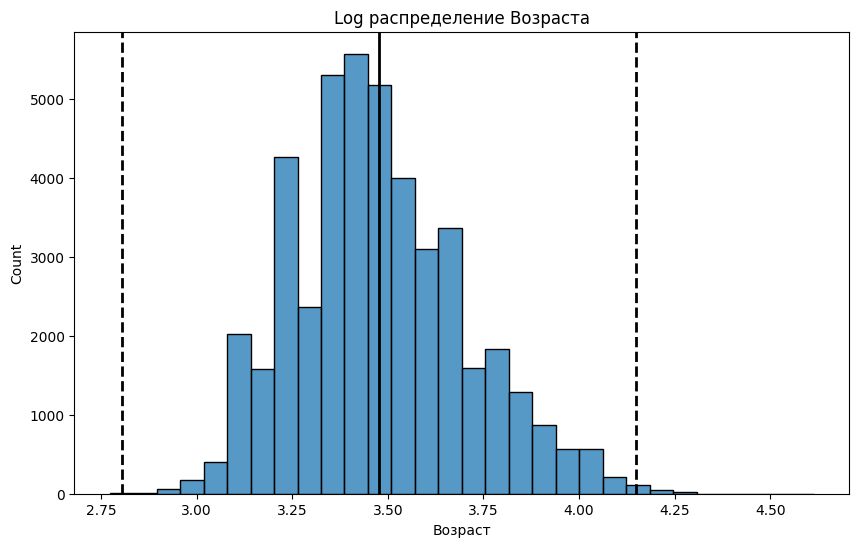

In [41]:
fig = plt.subplots(figsize=(10,6))

log_hist= np.log(hh_df['Возраст'] + 1)
histplot = sns.histplot(log_hist, bins=30)
histplot.set_title('Log распределение Возраста')

histplot.axvline(log_hist.mean(), color='k', lw=2)
histplot.axvline(log_hist.mean()+ 3 * log_hist.std(), color='k', ls='--', lw=2)
histplot.axvline(log_hist.mean()- 3 * log_hist.std(), color='k', ls='--', lw=2)

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_df, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

hh_df = hh_df.drop(outliers.index, axis=0)


Вывод: По графику видно, что логарифмическое распределение возраста ассиметрично в левую сторону. Враницы фильтрации стоит сдвинуть вправо.